# AllLife Bank Credit Card Customer Segmentation
---

### Problem Statement: 

Identify different segments in the existing customers based on their spending patterns as well as past interaction with the bank.


### 1. Import libraries

In [215]:
# import libraries for data manipulation and math calculations
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# import libraries for data preproccessing
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# import libraries for model building, training, and testing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, estimate_bandwidth
#!pip install scikit-learn-extra
#from sklearn_extra.cluster import KMedoids

# import sklear libraries for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

### 2. Import Data

In [669]:
# About the data:
# --------------------------
# Data is of various customers of a bank with their credit limit, the total number of credit cards the 
# customer has, and different channels through which customer has contacted the bank for any queries, different 
# channels include visiting the bank, online and through a call centre.

# - Sl_no - Customer Serial Number
# - Customer Key - Customer identification
# - Avg_Credit_Limit	- Average credit limit (currency is not specified, you can make an assumption around this)
# - Total_Credit_Cards	- Total number of credit cards 
# - Total_visits_bank	- Total bank visits
# - Total_visits_online -	 Total online visits
# - Total_calls_made - Total calls made

data = pd.read_excel('./dataset/CreditCardCustomerData.xlsx')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### 3. Exploratory Data Analysis

#### a. Dataset Description

In [115]:
# info(): 
# --------------------------
# prints information about a DataFrame including the index dtype and columns, 
# non-null values and memory usage.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are 660 observations and 7 columns in the dataset.
- All columns have 660 non-null values i.e. there are no missing values.
- All columns are of int64 data type.
- There are no missing values.

In [116]:
# Checking repeated customers: 
# --------------------------
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [117]:
# Printing duplicates
# --------------------------
duplicate_keys = data['Customer Key'].duplicated()
data[duplicate_keys]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


**Obervations:**
There are 5 duplicated key (customers). Cases will be adressed in the Data Preprocessing section.

In [13]:
# Describe():
# --------------------------
# Descriptive statistics include those that summarize the central tendency, dispersion 
# and shape of a dataset’s distribution, excluding NaN values.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


**Observations:**

- The average credit limit has a high range as it has a minimum value of 3K and a maximum value of 200K.
- The mean of the average credit limit is approx 34.5K with a large standard deviation of 37.4K.
- The average number of cards per customer is approx 5 (rounding off to nearest integer).
- On average, a customer has 2 bank visits, 3 online visits, and made 4 calls. 

#### *b. Univariate Analysis*

Avg_Credit_Limit
Skew : 2.2


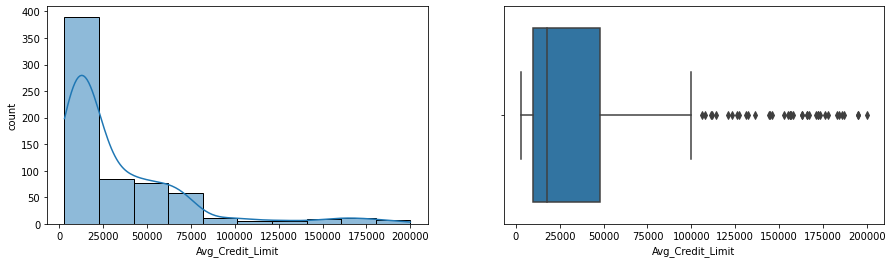

Total_Credit_Cards
Skew : 0.14


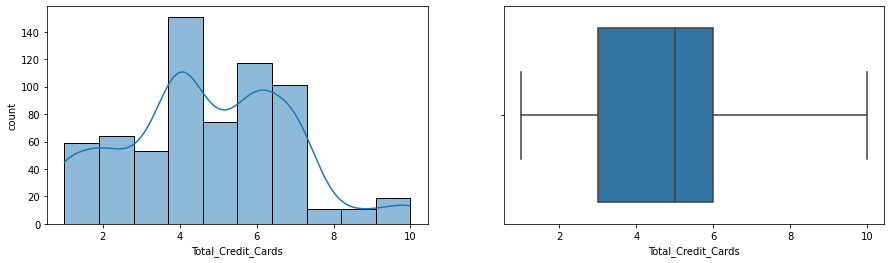

Total_visits_bank
Skew : 0.14


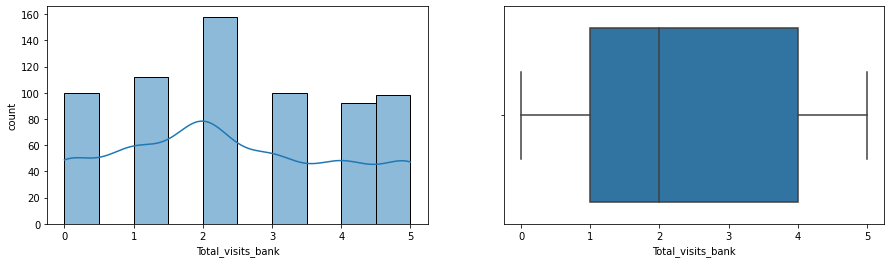

Total_visits_online
Skew : 2.23


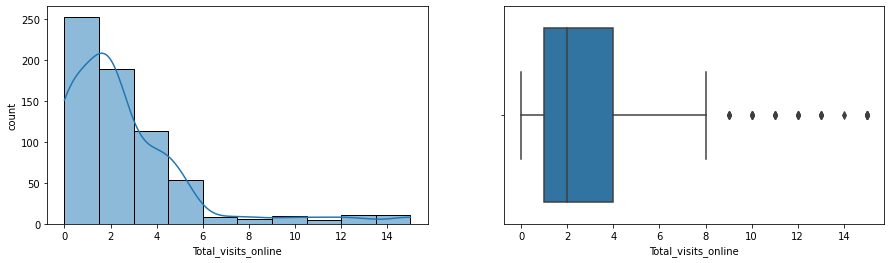

Total_calls_made
Skew : 0.66


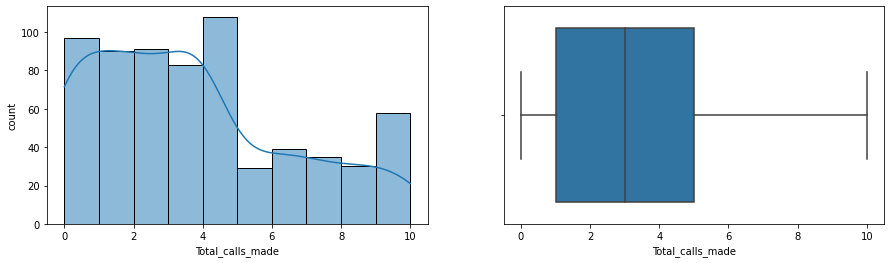

In [102]:
for col in data.iloc[:,2:].columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    
    # Bar plot
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    #data[col].hist(bins=10, grid=False)
    sns.histplot(data = data, x = col, kde = True, bins = 10)
    plt.ylabel('count')
        
    # Box plot
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observation:**

- No one distribution is normal in this dataset. All are positive skwed indicating mayority of cases are contrated in lower values of the range.
- The average credit limit and total visits online have a right skewed distribution with outliers over the upper limit.
- The majority of customers have 4 credits cards, 2 bank visits, and 4 calls.

In [90]:
# Reviewing Ouliers:

def outliers_skewedDist(df, ft):

    for i in ft:
        
        #calculating percentiles values
        percentile25 = df[ft].quantile(0.25)
        percentile75 = df[ft].quantile(0.75)

        #calculating inter-quartile range
        iqr = percentile75 - percentile25

        #calculating whiskers limits
        lower_limit = percentile25 - 1.5 * iqr
        upper_limit = percentile75 + 1.5 * iqr

    print('%s - > Outliers below distribution lower limit %0.0f | Outliers above distribution upper limit %0.0f' 
        % (ft, df[df[ft] < lower_limit].shape[0], df[df[ft] > upper_limit].shape[0]))
    
# Avg_Credit_Limit
# --------------------------
outliers_skewedDist(data, 'Avg_Credit_Limit')
# Total_visits_online
# --------------------------
outliers_skewedDist(data, 'Total_visits_online')


Avg_Credit_Limit - > Outliers below distribution lower limit 0 | Outliers above distribution upper limit 39
Total_visits_online - > Outliers below distribution lower limit 0 | Outliers above distribution upper limit 37


**Observation:**

There are ~40 outliers in columns Avg_Credit_Limit and Total_visits_online. They will be addressed in the data preprocessing section below because it may affect the performance of some clustering algorithms.

#### c. Bivariate Analysis

**Now, let's check the correlation among different variables.**

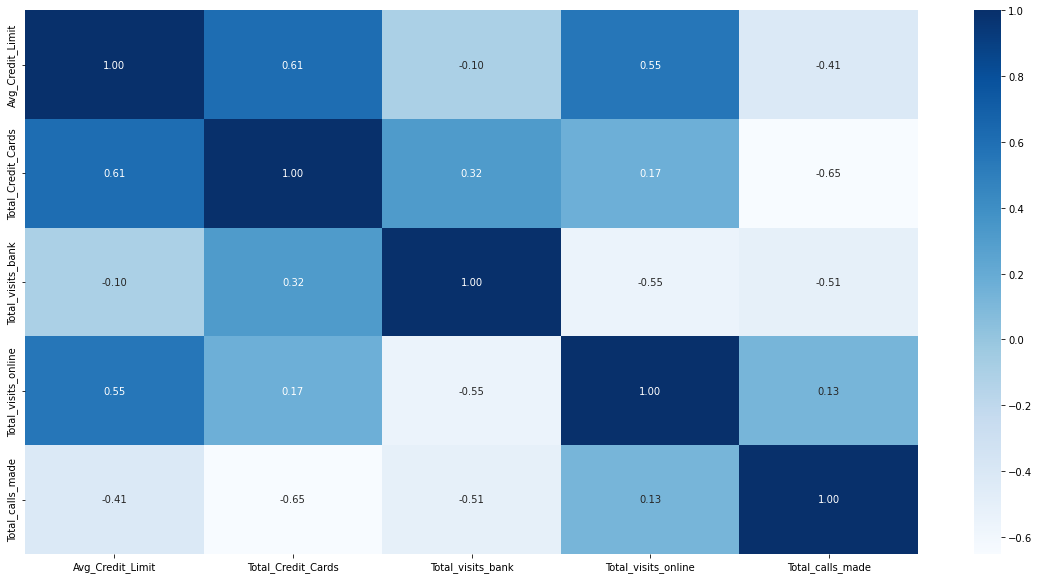

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(data.iloc[:,2:].corr(), annot=True, fmt='0.2f', cmap='Blues')
plt.show()

**Observation:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards Total_visits_online which can makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

### 4. Data Preprocessing

#### *a. Removing duplicated customers:*

In [157]:
# Removing duplicate rows (Customers)
# --------------------------
duplicate_keys = data['Customer Key'].duplicated()
data.drop(data[duplicate_keys].index, inplace= True)
data.shape


(655, 7)

**Observation:** 5 duplicated customer keys were dropped.

#### *b. Removing not needed columns for model analysis:*

In [159]:
# Removing columns 
# --------------------------
data.drop(['Sl_No', 'Customer Key'], axis = 1, inplace = True)
data.shape

(655, 5)

**Observation:** Columns Sl_No and  Customer Key were dropped.

#### *c. Data Normalization:*

In [163]:
# Normalization
# --------------------------------------
# The goal of normalization is to change the values of numeric columns in the dataset to use a 
# common scale, without distorting differences in the ranges of values or losing information.
# The StandardScaler() is a function used to resize the distribution of values ​​so that the 
# mean of the observed values ​​is 0 and the standard deviation is 1.

# Clustering algorithms are distance based algorithms and all distance based algorithms are affected 
# by the scale of the variables. Therefore, we will scale the data before applying clustering algorithms.


# Scaling and normalizing predictor variables
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

# Peak to Peak: new range of values for each feature
np.ptp(data_scaled)

Avg_Credit_Limit       5.293926
Total_Credit_Cards     4.151927
Total_visits_bank      3.062974
Total_visits_online    5.105280
Total_calls_made       3.490203
dtype: float64

**Observation:**

All variables have been scaled to a similar range of values. This will help the models improve the processing time and their accuracy.

### 5. Model Building, Training and Testing

#### *a. K-Means:*

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster

Let us now fit k-means algorithm on our scaled data and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the SSE for each k
2. Run for a range of Ks and store Sum of Squered Errors (SSE) for each run
3. Plot the SSE vs K and find the elbow

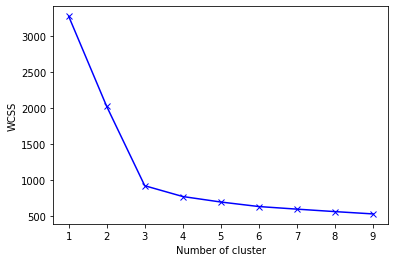

In [176]:
# step 1
WCSS = {} 

# step 2
# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the 
# clustering object and store the inertia value for that k 
# inertia_ is the sum of squared distances of samples to their closest cluster center, weighted by 
# the sample weights if provided.

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_scaled)
    WCSS[k] = kmeans.inertia_

# step 3
plt.figure()
plt.plot(list(WCSS.keys()), list(WCSS.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

**Observations:** Looking at the plot, we can say that elbow point is achieved for k=3.


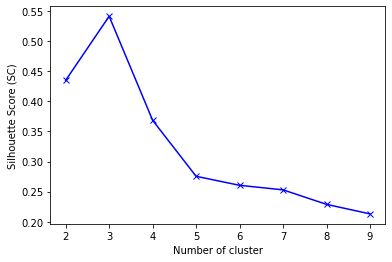

In [441]:
# silhouette_score ()
# --------------------------------------
# The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning 
# that the data point i is very compact within the cluster to which it belongs and far away from the 
# other clusters. The worst value is -1. Values near 0 denote overlapping clusters.

# Empty dictionary to store the Silhouette score for each value of k
SC = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    SC[k] = silhouette_score(data_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(SC.keys()), list(SC.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score (SC)")
plt.show()

**Observation:** Here the best value for the SC is found when using 3 nodes. Which is consistent with the WCSS result.


In [554]:
# Fitting  K-means with k = 3
# --------------------------------------
# Fitting the K-means algorithms on the scaled data with number of cluster equal to 3 and Storing 
# the predictions as 'km_labels' to the 'data_scaled_km' and 'data' dataframes
kmeans = KMeans(n_clusters=3, max_iter= 1000, random_state=1)
kmeans.fit(data_scaled)

# Adding predicted labels to the original data and scaled data 
data_scaled_km = data_scaled.copy()
data_scaled_km['km_labels'] = kmeans.predict(data_scaled_km)
cluster_centers_km = kmeans.cluster_centers_
data['labels'] = kmeans.predict(data_scaled)

**Observation:** We have generated the labels with k-means for our dataset. The new column is named "Labels"

##### *K-means Results:*

In [717]:
# Number of observations in each cluster
data_scaled_km.km_labels.value_counts()

1    382
0    224
2     49
Name: km_labels, dtype: int64

In [556]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('labels').mean()
median = data.groupby('labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12174.107143,33604.712042,140102.040816,12000.0,31000.0,145000.0
Total_Credit_Cards,2.410714,5.505236,8.775510,2.0,6.0,9.0
Total_visits_bank,0.933036,3.494764,0.591837,1.0,3.0,1.0
Total_visits_online,3.553571,0.976440,10.979592,4.0,1.0,11.0
Total_calls_made,6.870536,2.005236,1.102041,7.0,2.0,1.0


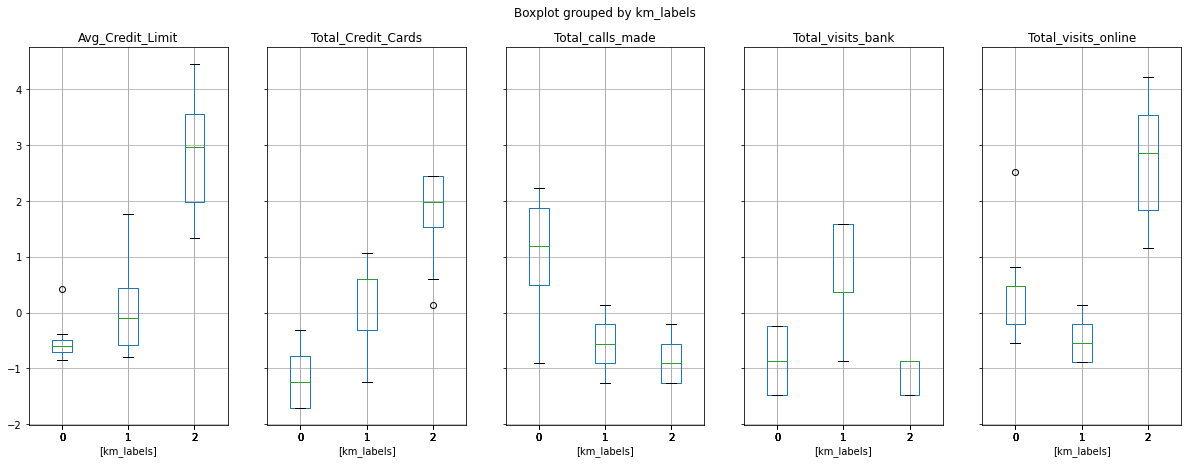

In [564]:
# Visualizing different features w.r.t K-means labels
data_scaled_km.boxplot(by = 'km_labels', layout = (1, 5), figsize = (20, 7))
plt.show()

**Cluster Profiles:**
- Cluster 0 - Low Credit Cutsomers: This cluster represents customers with low credit limit and prefers to interact with the bank via calls and therefore they have less number of bank and online visits.

- Cluster 1 - Medium Credit Customers: This cluster represents customers with medium credit limit, who spends comparatively more than low credit customers and visits the bank more often and therefore they have less number of calls and online visits.

- Cluster 2 - High Credit Customers: This cluster represents customers with high spending and prefers to contact the bank through online channel and therefore they have less number of total calls and bank visits.

#### *b. Gaussian Mixture Model (GMM):*

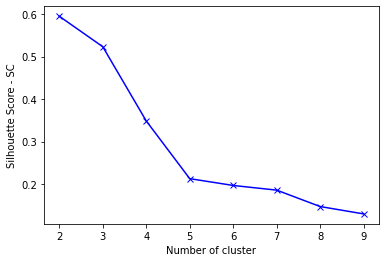

In [570]:
# Finding Optimal K using Silhouette Score for GMM model
# --------------------------------------
# Empty dictionary to store the Silhouette score for each value of k
SC = {} 

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 10):
    GMM = GaussianMixture(n_components = k).fit(data_scaled)
    labels = GMM.predict(data_scaled)
    SC[k] = silhouette_score(data_scaled, labels, sample_size = 300, random_state = 5 )

# Elbow plot
plt.figure()
plt.plot(list(SC.keys()), list(SC.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score - SC")
plt.show()

In [578]:
# Fitting GMM with k = 3
# --------------------------------------
gmm = GaussianMixture(n_components = 3)
gmm.fit(data_scaled)

# Adding predicted labels to the original data and scaled data
data_scaled_gmm = data_scaled.copy()
data_scaled_gmm['gmm_labels'] = gmm.predict(data_scaled_gmm)
data['labels'] = gmm.predict(data_scaled)


##### *GMM Results:*

In [579]:
# Number of observations in each cluster
data_scaled_gmm.gmm_labels.value_counts()

0    382
1    224
2     49
Name: gmm_labels, dtype: int64

In [581]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('labels').mean()
median = data.groupby('labels').median()
df_gmm = pd.concat([mean, median], axis=0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_gmm.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,33604.712042,12174.107143,140102.040816,31000.0,12000.0,145000.0
Total_Credit_Cards,5.505236,2.410714,8.775510,6.0,2.0,9.0
Total_visits_bank,3.494764,0.933036,0.591837,3.0,1.0,1.0
Total_visits_online,0.976440,3.553571,10.979592,1.0,4.0,11.0
Total_calls_made,2.005236,6.870536,1.102041,2.0,7.0,1.0


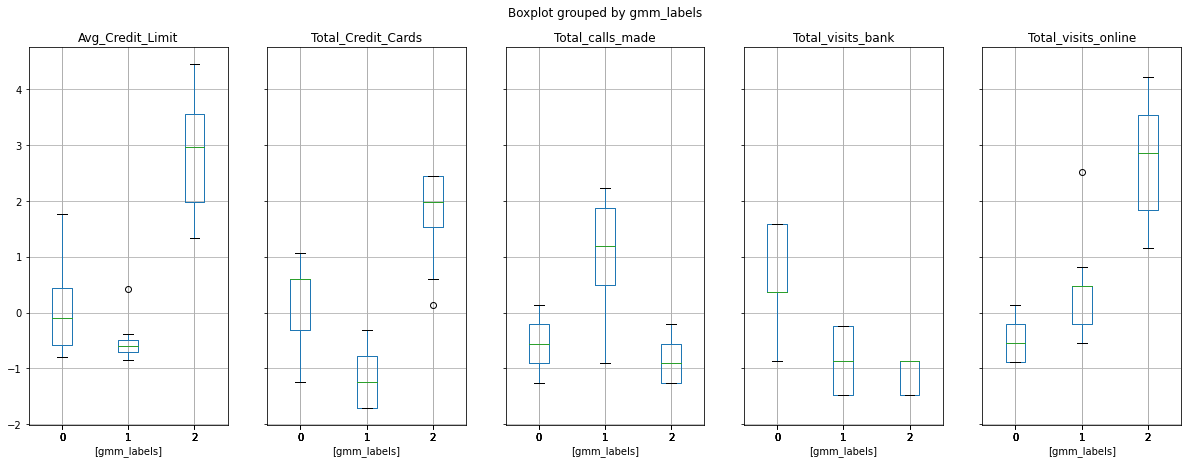

In [583]:
# Visualizing different features w.r.t GMM labels
data_scaled_gmm.boxplot(by = 'gmm_labels', layout = (1,5), figsize = (20,7))
plt.show()

**Cluster Profiles:**


- Cluster 0 - Medium Credit Customers: This cluster represents customers who spends comparatively more than low credit customers and visits the bank more often and therefore they have less number of calls and online visits.

- Cluster 1 - Low Credit Cutsomers: This cluster represents customers with low spending and prefers to interact with the bank via calls and therefore they have less number of bank and online visits.

- Cluster 2 - High Credit Customers: This cluster represents customers with high spending and prefers to contact the bank through online channel and therefore they have less number of total calls and bank visits.

**Comparing Clusters:**

- The cluster profiles are the same as the K-means clusters.

### 6. Results

K-Means is performing good. It was able to group data in three different clusters with clear identification of datapoints to the K center they belong to. GMM is algo giving great results creating almost the same clusters.

As a general note the choice of algorithm here will depend on the context and use case, but for this data set any of them will perform good in production.


In [724]:
def cluster_plot(df, centroids, labels):

    cols_visualise = ["Avg_Credit_Limit", "Total_Credit_Cards","Total_visits_bank","Total_visits_online",
                            "Total_calls_made"]
    
    fig = plt.figure(figsize=(20,7))
    for i in range(len(cols_visualise)):
        ax = plt.subplot(1, 5, i + 1)
        # Plotting clusters datapoints
        sns.scatterplot(x = cols_visualise[i], y = 'Avg_Credit_Limit', data = df , hue = labels, palette='tab10', alpha = 0.5)
        # Plotting centroids
        for j in range(3):
            plt.plot(centroids[j, i], centroids[j, 0], "o", markeredgecolor="k", markersize=10)

    #fig.suptitle("Best Model Summary")
    fig.savefig('./imgs/summary_plt.jpg')


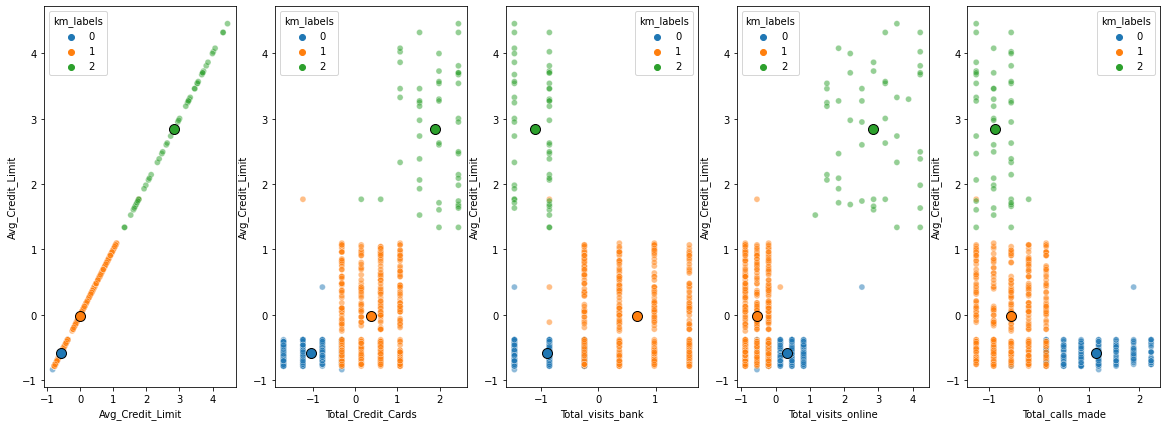

In [725]:
cluster_plot(data_scaled_km, cluster_centers_km, 'km_labels')